https://dacon.io/competitions/open/235874/codeshare/4618?page=1&dtype=tag&fType&category=codeshare
# ResNet 구현 및 수정하기 (public 0.915)

In [ ]:
## 터미널  python -m venv venv           ,    venv\Scripts\activate    ,     pip install autogluon    ##재부팅해도 사라지진않아,,   autogluon은 1회용

SyntaxError: unexpected character after line continuation character (1412357562.py, line 1)

In [8]:
# # Autogluon 설치
# !pip install -U autogluon

# from autogluon.vision import ImagePredictor


# from google.colab import drive
# drive.mount('/content/drive')

# %cd '/content/drive/MyDrive/경진대회3차'

# # 학습 데이터 폴더 경로
# train_folder = './train/'

# # 이미지 분류 모델 훈련
# predictor = ImagePredictor()
# predictor.fit(train_folder, hyperparameters={'epochs': 50})  # epochs 및 다른 하이퍼파라미터를 설정하여 모델 훈련

# # 테스트 이미지 폴더 경로
# test_folder = './test/'

# # 테스트 데이터에 대한 예측 수행
# test_predictions = predictor.predict(test_folder)
# print(test_predictions)

In [9]:
# from autogluon import ImagePredictor

# from google.colab import drive
# drive.mount('/content/drive')

# %cd '/content/drive/MyDrive/경진대회3차'

# # 학습 데이터 폴더 경로
# train_folder = './train/'

# # 이미지 분류 모델 훈련
# predictor = ImagePredictor()
# predictor.fit(train_folder, hyperparameters={'epochs': 50})  # epochs 및 다른 하이퍼파라미터를 설정하여 모델 훈련

# # 테스트 이미지 폴더 경로
# test_folder = './test/'

# # 테스트 데이터에 대한 예측 수행
# test_predictions = predictor.predict(test_folder)
# print(test_predictions)


In [10]:
# from google.colab import drive
# drive.mount('/content/drive')

In [1]:
import os
import warnings
warnings.filterwarnings(action='ignore')

os.environ["CUDA_VISIBLE_DEVICES"]="0" # GPU 할당

In [2]:
# import tensorflow as tf
# device_name = tf.test.gpu_device_name()
# if device_name != '/device:GPU:0':
#   raise SystemError('GPU device not found')
# print('Found GPU at: {}'.format(device_name))

In [3]:
!pip install tensorflow

In [1]:
import pandas as pd
import numpy as np
import os



import matplotlib.pyplot as plt
import seaborn as sns
import shutil
import glob
import seaborn as sns
import tensorflow as tf
from  tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, InputLayer, Resizing
from tensorflow.keras.layers import Conv2D, BatchNormalization
from tensorflow.keras.layers import MaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Flatten, RandomRotation, RandomTranslation, RandomFlip, RandomContrast
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import cohen_kappa_score
from keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing import image
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers.experimental import preprocessing

2023-11-27 20:19:53.628787: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-27 20:19:53.703406: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:




import tensorflow as tf
tf.config.list_logical_devices()

2023-11-27 20:19:56.370917: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 7923 MB memory:  -> device: 0, name: NVIDIA A100 80GB PCIe MIG 1g.10gb, pci bus id: 0000:d5:00.0, compute capability: 8.0


[LogicalDevice(name='/device:CPU:0', device_type='CPU'),
 LogicalDevice(name='/device:GPU:0', device_type='GPU')]

In [4]:
base_path = './'
train_df = pd.read_csv(os.path.join(base_path, 'train.csv'))

In [15]:
from glob import glob
import numpy as np
import PIL
from PIL import Image
import os

path = './train/'
folders = ['Queen', 'King', 'Knight', 'Bishop', 'Pawn', 'Rook']

training_images = []
training_labels = []

# 이미지 크기 재조정하는 함수
def resize_image(img):
    img_resized = img.resize((224, 224))  # 이미지 크기를 224x224로 조정
    img_array = np.array(img_resized)
    return img_array

for folder in folders:
    folder_path = os.path.join(path, folder)
    for ext in ['*.jpg', '*.png', '*.JPG', '*.jpeg', '*.fcgi']:
        for img_path in glob(os.path.join(folder_path, ext)):
            an_img = PIL.Image.open(img_path)  # Read image
            img_array = resize_image(an_img)  # Resize image
            training_images.append(img_array)  # Append array to training_images
            training_labels.append(folder)  # Append label

training_images = np.array(training_images)
training_labels = np.array(training_labels)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
training_labels = le.fit_transform(training_labels)
training_labels = training_labels.reshape(-1, 1)

print(training_images.shape)
print(training_labels.shape)


(493, 224, 224, 3)
(493, 1)


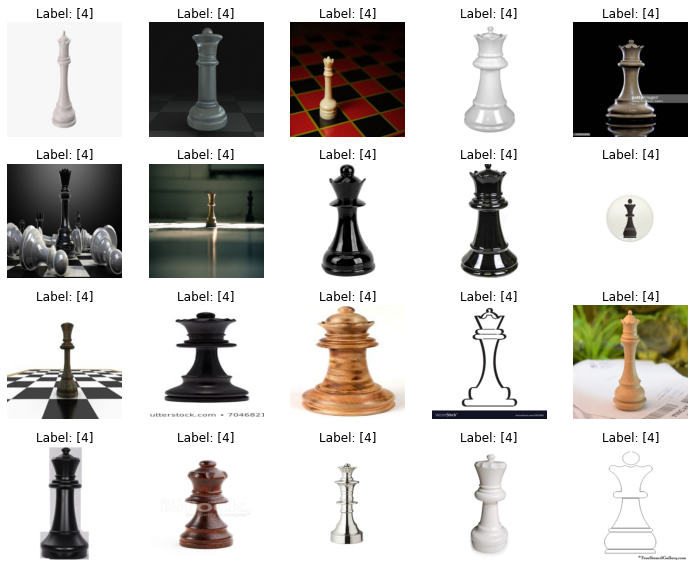

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

num_images_to_display = 20  # 표시할 이미지 수

plt.figure(figsize=(10, 8))  # 전체 그림의 크기를 조절합니다

for i in range(num_images_to_display):
    plt.subplot(4, 5, i + 1)
    plt.imshow(training_images[i])  # training_images는 이미지 데이터를 포함하는 배열입니다
    plt.title(f"Label: {training_labels[i]}")  # training_labels는 각 이미지에 대한 레이블 정보를 담은 배열입니다
    plt.axis('off')  # 축 제거
plt.tight_layout()  # 레이아웃을 조정하여 각 subplot이 겹치지 않도록 합니다
plt.show()


# import matplotlib.pyplot as plt
# %matplotlib inline

# for i in range(20):
#     plt.subplot(4, 5, i + 1)
#     plt.imshow(training_images[i*300])
#     print(training_labels[i*300], end=",")
# plt.show()

In [17]:
label_num = [0,1,2,3,4,5]
label_name = le.inverse_transform(label_num)

for i in range(6):
    print(label_num[i], label_name[i])

0 Bishop
1 King
2 Knight
3 Pawn
4 Queen
5 Rook


In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

tf.random.set_seed(42)

def apply_gaussian_noise(image):
    noise = tf.random.normal(shape=tf.shape(image), mean=0.0, stddev=0.005, dtype=tf.float32)
    noisy_image = tf.clip_by_value(image + noise * 0.1, 0.0, 1.0)  # 0.1은 노이즈 강도를 조절하는 매개변수입니다.
    return noisy_image

image_generator = ImageDataGenerator(
    rotation_range=30,
    brightness_range = [0.8, 1.0],
    zoom_range=0.3,
    width_shift_range=0.2,
    # height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=False ,
    fill_mode='nearest',
    shear_range=0.2, # Random Shear(랜덤 변형)
    # preprocessing_function=apply_gaussian_noise
)

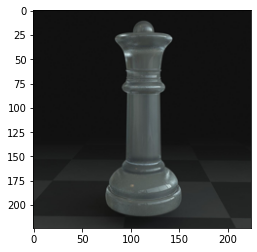

In [19]:
sample_image = training_images[1]
plt.imshow(sample_image.astype('uint8'))
sample_image = np.expand_dims(sample_image, 0)

In [20]:
sample_image_it = image_generator.flow(sample_image, batch_size=1, seed = 42)

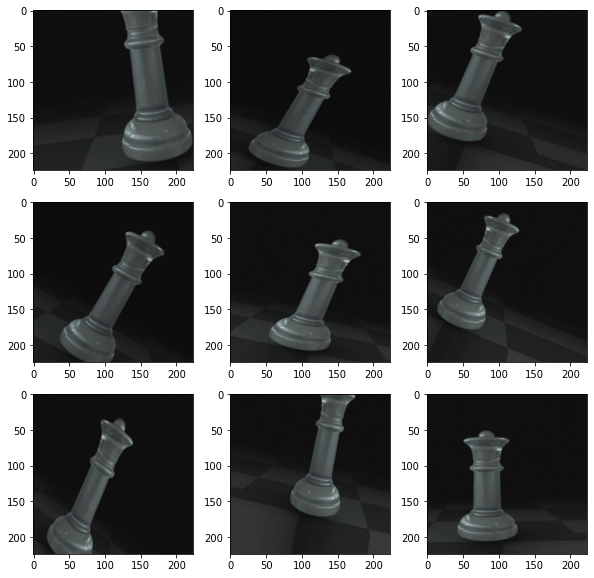

In [21]:
fig = plt.figure(figsize = (10,10))
for i in range(9):
    plt.subplot(3, 3, 1+i)
    batch = sample_image_it.next()
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.show()

In [22]:
augment_size=2000

np.random.seed(42)

random_mask = np.random.randint(training_images.shape[0], size=augment_size)
training_image_aug = training_images[random_mask].copy()
training_labels_aug = training_labels[random_mask].copy()

In [23]:
training_image_aug = image_generator.flow(training_image_aug, np.zeros(augment_size), batch_size=augment_size, shuffle=False, seed = 42).next()[0]

training_images = np.concatenate((training_images, training_image_aug))
training_labels = np.concatenate((training_labels, training_labels_aug))

In [24]:
print(training_images.shape)
print(training_labels.shape)

(2493, 224, 224, 3)
(2493, 1)


tf.Tensor([[0. 0. 0. 0. 1. 0.]], shape=(1, 6), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 1. 0.]], shape=(1, 6), dtype=float32)


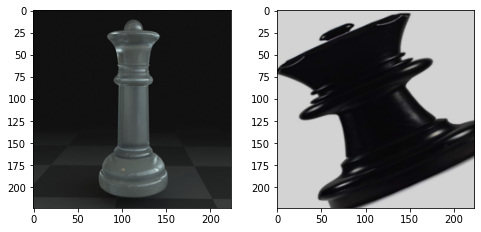

In [26]:
import tensorflow as tf

sample_image = training_images[1]
sample_label = tf.one_hot(training_labels[1], 6) # one hot encoding을 진행해야 mixup을 할 수 있습니다.

sample_image2 = training_images[2001]
sample_label2 = tf.one_hot(training_labels[2001], 6)

fig = plt.figure(figsize = (8,8))

plt.subplot(2, 2, 1)
plt.imshow(sample_image.astype('uint8'))
print(sample_label)

plt.subplot(2, 2, 2)
plt.imshow(sample_image2.astype('uint8'))
print(sample_label2)

plt.show()

In [27]:
def sample_beta_distribution(size, concentration_0=0.2, concentration_1=0.2):
    gamma_1_sample = tf.random.gamma(shape=[size], alpha=concentration_1)
    gamma_2_sample = tf.random.gamma(shape=[size], alpha=concentration_0)
    return gamma_1_sample / (gamma_1_sample + gamma_2_sample)


def mix_up(ds_one, ds_two, batch_size = 1, alpha=0.2):
    # Unpack two datasets
    images_one, labels_one = ds_one
    images_two, labels_two = ds_two

    # Sample lambda and reshape it to do the mixup
    l = sample_beta_distribution(batch_size, alpha, alpha)
    x_l = tf.reshape(l, (batch_size, 1, 1, 1))
    y_l = tf.reshape(l, (batch_size, 1))

    # Perform mixup on both images and labels by combining a pair of images/labels
    # (one from each dataset) into one image/label
    images = images_one * x_l + images_two * (1 - x_l)
    labels = labels_one * y_l + labels_two * (1 - y_l)
    return (images, labels)

[0.0, 0.0, 0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 1.0, 0.0]


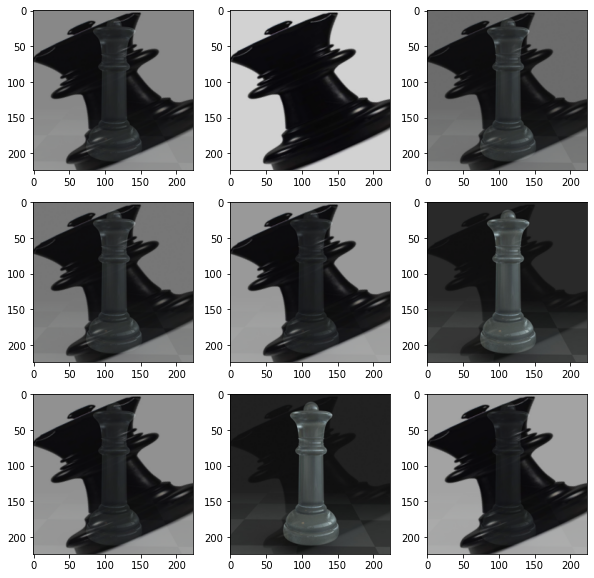

In [28]:
mix_image, mix_label = mix_up((sample_image, sample_label), (sample_image2, sample_label2), batch_size = 9, alpha = 0.5)

fig = plt.figure(figsize = (10,10))
for i in range(9):
    plt.subplot(3, 3, 1+i)
    image = mix_image[i]
    plt.imshow(image.numpy().squeeze().astype('uint8'))
    print(mix_label[i].numpy().tolist())

In [29]:
import random
random.seed(42)
from sys import stdout

training_labels = tf.one_hot(training_labels, 6) #mixup을 적용하기 위해 one-hot 기법을 적용해줍니다

mix_training_images = []
mix_training_labels = []

for i in range(3):
    random_num = random.sample(range(0,492), 492) #augmentation을 적용한 데이터를 제외하고 mix해보겠습니다
    print("\nAttempt", i)
    progress_before = 0

    for i in range(0,492,2):
        image_1 = training_images[random_num[i]]
        label_1 = training_labels[random_num[i]]

        image_2 = training_images[random_num[i+1]]
        label_2 = training_labels[random_num[i+1]]

        mix_image, mix_label = mix_up((image_1, label_1), (image_2, label_2))

        mix_training_images.append(mix_image[0])
        mix_training_labels.append(mix_label[0])

        #just for ui
        progress = int(100*(i/491))
        if progress != progress_before:
            progress_before = progress
            stdout.write("\r ========= %d%% completed =========" %progress)
            stdout.flush()

mix_training_images = np.array(mix_training_images)
mix_training_labels = np.array(mix_training_labels)


Attempt 0
 ========= 99% completed =========
Attempt 1
 ========= 99% completed =========
Attempt 2
 ========= 99% completed =========

In [30]:
print('mix_train 크기:',mix_training_images.shape)
print('mix_label 크기:',mix_training_labels.shape)

mix_train 크기: (738, 224, 224, 3)
mix_label 크기: (738, 6)


In [31]:
import os
from glob import glob
import PIL
import numpy as np

path = './test/'
valid_extensions = ['.jpg', '.png', '.JPG']  # 확장자 목록

def resize_image(img):
    img_resized = img.resize((224, 224))  # 이미지 크기를 224x224로 조정
    img_array = np.array(img_resized)
    return img_array

test_images = []
test_idx = []

flist = sorted(glob(path + '*'))

for filename in flist:
    if any(ext in filename for ext in valid_extensions):
        an_img = PIL.Image.open(filename)  # 이미지 읽기
        resized_img = resize_image(an_img)  # 이미지 크기 조정
        test_images.append(resized_img)  # 배열을 test_images에 추가

        label = os.path.basename(filename)  # 파일명에서 ID 가져오기
        test_idx.append(label)  # ID를 test_idx에 추가

test_images = np.array(test_images)

print(test_images.shape)
print(test_idx[:5])  # 처음 5개의 파일 ID 출력


(60, 224, 224, 3)
['test_0.jpg', 'test_1.jpg', 'test_10.png', 'test_11.png', 'test_12.jpg']


In [33]:
from sklearn.model_selection import train_test_split

training_labels = np.array(training_labels)
training_labels = training_labels.reshape(-1,6) #mixup에서 one-hot 기법을 적용했다면, shape을 바꿔줍니다.

X_train, X_valid, y_train, y_valid = train_test_split(training_images, 
                                                      training_labels, 
                                                      test_size=0.05, 
                                                      stratify = training_labels, 
                                                      random_state=42)

X_train = np.concatenate((X_train, mix_training_images)) #mixup한 75000개의 데이터를 train set에 추가해줍니다
y_train = np.concatenate((y_train, mix_training_labels))

X_test = test_images

In [34]:
print('X_train 크기:',X_train.shape)
print('y_train 크기:',y_train.shape)
print('X_valid 크기:',X_valid.shape)
print('y_valid 크기:',y_valid.shape)
print('X_test  크기:',X_test.shape)

X_train 크기: (3106, 224, 224, 3)
y_train 크기: (3106, 6)
X_valid 크기: (125, 224, 224, 3)
y_valid 크기: (125, 6)
X_test  크기: (60, 224, 224, 3)


In [35]:
X_train = X_train / 255.0
X_valid = X_valid / 255.0
X_test = X_test / 255.0

# 모델생성

In [36]:
def identity_block(X, filters, kernel_size):
    X_shortcut = X

    X = tf.keras.layers.Conv2D(filters, kernel_size, padding='SAME')(X)
    X = tf.keras.layers.BatchNormalization()(X)
    X = tf.keras.layers.Activation('relu')(X)

    X = tf.keras.layers.Conv2D(filters, kernel_size, padding='SAME')(X)
    X = tf.keras.layers.BatchNormalization()(X)
    X = tf.keras.layers.Activation('relu')(X)

    X = tf.keras.layers.Conv2D(filters, kernel_size, padding='SAME')(X)
    X = tf.keras.layers.BatchNormalization()(X)

    # Add
    X = tf.keras.layers.Add()([X, X_shortcut])
    X = tf.keras.layers.Activation('relu')(X)

    return X

In [37]:
def convolutional_block(X, filters, kernel_size):
    X_shortcut = X

    X = tf.keras.layers.Conv2D(filters, kernel_size, padding='SAME')(X)
    X = tf.keras.layers.BatchNormalization()(X)
    X = tf.keras.layers.Activation('relu')(X)

    X = tf.keras.layers.Conv2D(filters, kernel_size, padding='SAME')(X)
    X = tf.keras.layers.BatchNormalization()(X)
    X = tf.keras.layers.Activation('relu')(X)

    X = tf.keras.layers.Conv2D(filters, kernel_size, padding='SAME')(X)
    X = tf.keras.layers.BatchNormalization()(X)

    X_shortcut = tf.keras.layers.Conv2D(filters, kernel_size, padding='SAME')(X_shortcut)
    X_shortcut = tf.keras.layers.BatchNormalization()(X_shortcut)

    # Add
    X = tf.keras.layers.Add()([X, X_shortcut])
    X = tf.keras.layers.Activation('relu')(X)

    return X

In [38]:
def ResNet50CL(input_shape = (224, 224, 3), classes = 6):
    X_input = tf.keras.layers.Input(input_shape)
    X = X_input

    X = convolutional_block(X, 64, (3,3)) #conv
    X = identity_block(X, 64, (3,3))
    X = tf.keras.layers.MaxPooling2D(2, 2, padding='SAME')(X)

    X = convolutional_block(X, 128, (3,3)) #64->128, use conv block
    X = identity_block(X, 128, (3,3))
    X = tf.keras.layers.MaxPooling2D(2, 2, padding='SAME')(X)

    X = convolutional_block(X, 256, (3,3)) #128->256, use conv block
    X = identity_block(X, 256, (3,3))
    X = tf.keras.layers.MaxPooling2D(2, 2, padding='SAME')(X)

    X = convolutional_block(X, 512, (3,3)) #256->512, use conv block
    X = identity_block(X, 512, (3,3))
    X = tf.keras.layers.MaxPooling2D(2, 2, padding='SAME')(X)

    X = tf.keras.layers.GlobalAveragePooling2D()(X)
    X = tf.keras.layers.Dense(6, activation = 'softmax')(X) # ouput layer (10 class)

    model = tf.keras.models.Model(inputs = X_input, outputs = X, name = "ResNet50CL")

    return model

In [39]:

def ResNet50C(input_shape = (224, 224, 3), classes = 6):
    X_input = tf.keras.layers.Input(input_shape)
    X = X_input

    X = tf.keras.layers.Conv2D(64, (3,3), padding='SAME')(X)
    X = tf.keras.layers.BatchNormalization()(X)
    X = tf.keras.layers.Activation('relu')(X)

    X = convolutional_block(X, 64, (3,3)) #use conv block (?)
    X = identity_block(X, 64, (3,3))
    X = identity_block(X, 64, (3,3))
    X = tf.keras.layers.MaxPooling2D(2, 2, padding='SAME')(X)

    X = convolutional_block(X, 128, (3,3)) #64->128, use conv block
    X = identity_block(X, 128, (3,3))
    X = identity_block(X, 128, (3,3))
    X = tf.keras.layers.MaxPooling2D(2, 2, padding='SAME')(X)

    X = convolutional_block(X, 256, (3,3)) #128->256, use conv block
    X = identity_block(X, 256, (3,3))
    X = identity_block(X, 256, (3,3))
    X = tf.keras.layers.MaxPooling2D(2, 2, padding='SAME')(X)

    X = convolutional_block(X, 512, (3,3)) #256->512, use conv block
    X = identity_block(X, 512, (3,3))
    X = identity_block(X, 512, (3,3))
    X = tf.keras.layers.MaxPooling2D(2, 2, padding='SAME')(X)

    X = tf.keras.layers.GlobalAveragePooling2D()(X)
    X = tf.keras.layers.Dense(6, activation = 'softmax')(X) # ouput layer (10 class)

    model = tf.keras.models.Model(inputs = X_input, outputs = X, name = "ResNet50C")

    return model


In [40]:
model = ResNet50CL()
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [41]:
model.summary()

Model: "ResNet50CL"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 224, 224, 64)         1792      ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 224, 224, 64)         256       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 224, 224, 64)         0         ['batch_normalization

In [44]:
EPOCH = 50
BATCH_SIZE = 128

earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                              patience=10, 
                             )

reduceLR = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=4,
)

In [45]:
data = model.fit(X_train, 
                 y_train, 
                 validation_data=(X_valid, y_valid), 
                 epochs=EPOCH, 
                 batch_size=BATCH_SIZE, 
                 callbacks=[reduceLR, earlystopping],)

Epoch 1/50


2023-11-27 20:25:28.904541: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:425] Loaded runtime CuDNN library: 8.2.0 but source was compiled with: 8.6.0.  CuDNN library needs to have matching major version and equal or higher minor version. If using a binary install, upgrade your CuDNN library.  If building from sources, make sure the library loaded at runtime is compatible with the version specified during compile configuration.
2023-11-27 20:25:28.912182: W tensorflow/core/framework/op_kernel.cc:1828] OP_REQUIRES failed at conv_ops_impl.h:770 : UNIMPLEMENTED: DNN library is not found.
2023-11-27 20:25:29.015695: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:425] Loaded runtime CuDNN library: 8.2.0 but source was compiled with: 8.6.0.  CuDNN library needs to have matching major version and equal or higher minor version. If using a binary install, upgrade your CuDNN library.  If building from sources, make sure the library loaded at runtime is compatible with th

UnimplementedError: Graph execution error:

Detected at node 'ResNet50CL/conv2d/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.8/runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.8/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.8/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.8/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.8/dist-packages/ipykernel/kernelapp.py", line 677, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.8/dist-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.8/asyncio/base_events.py", line 570, in run_forever
      self._run_once()
    File "/usr/lib/python3.8/asyncio/base_events.py", line 1859, in _run_once
      handle._run()
    File "/usr/lib/python3.8/asyncio/events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "/usr/local/lib/python3.8/dist-packages/ipykernel/kernelbase.py", line 457, in dispatch_queue
      await self.process_one()
    File "/usr/local/lib/python3.8/dist-packages/ipykernel/kernelbase.py", line 446, in process_one
      await dispatch(*args)
    File "/usr/local/lib/python3.8/dist-packages/ipykernel/kernelbase.py", line 353, in dispatch_shell
      await result
    File "/usr/local/lib/python3.8/dist-packages/ipykernel/kernelbase.py", line 648, in execute_request
      reply_content = await reply_content
    File "/usr/local/lib/python3.8/dist-packages/ipykernel/ipkernel.py", line 353, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "/usr/local/lib/python3.8/dist-packages/ipykernel/zmqshell.py", line 533, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py", line 2914, in run_cell
      result = self._run_cell(
    File "/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py", line 2960, in _run_cell
      return runner(coro)
    File "/usr/local/lib/python3.8/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner
      coro.send(None)
    File "/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py", line 3185, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py", line 3377, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py", line 3457, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_25751/2648811027.py", line 1, in <module>
      data = model.fit(X_train,
    File "/home/jovyan/.local/lib/python3.8/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/jovyan/.local/lib/python3.8/site-packages/keras/src/engine/training.py", line 1742, in fit
      tmp_logs = self.train_function(iterator)
    File "/home/jovyan/.local/lib/python3.8/site-packages/keras/src/engine/training.py", line 1338, in train_function
      return step_function(self, iterator)
    File "/home/jovyan/.local/lib/python3.8/site-packages/keras/src/engine/training.py", line 1322, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/jovyan/.local/lib/python3.8/site-packages/keras/src/engine/training.py", line 1303, in run_step
      outputs = model.train_step(data)
    File "/home/jovyan/.local/lib/python3.8/site-packages/keras/src/engine/training.py", line 1080, in train_step
      y_pred = self(x, training=True)
    File "/home/jovyan/.local/lib/python3.8/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/jovyan/.local/lib/python3.8/site-packages/keras/src/engine/training.py", line 569, in __call__
      return super().__call__(*args, **kwargs)
    File "/home/jovyan/.local/lib/python3.8/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/jovyan/.local/lib/python3.8/site-packages/keras/src/engine/base_layer.py", line 1150, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/jovyan/.local/lib/python3.8/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/home/jovyan/.local/lib/python3.8/site-packages/keras/src/engine/functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "/home/jovyan/.local/lib/python3.8/site-packages/keras/src/engine/functional.py", line 669, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/home/jovyan/.local/lib/python3.8/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/jovyan/.local/lib/python3.8/site-packages/keras/src/engine/base_layer.py", line 1150, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/jovyan/.local/lib/python3.8/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/home/jovyan/.local/lib/python3.8/site-packages/keras/src/layers/convolutional/base_conv.py", line 290, in call
      outputs = self.convolution_op(inputs, self.kernel)
    File "/home/jovyan/.local/lib/python3.8/site-packages/keras/src/layers/convolutional/base_conv.py", line 262, in convolution_op
      return tf.nn.convolution(
Node: 'ResNet50CL/conv2d/Conv2D'
DNN library is not found.
	 [[{{node ResNet50CL/conv2d/Conv2D}}]] [Op:__inference_train_function_54008]

In [ ]:
import matplotlib.pyplot as plot

plot.plot(data.history['accuracy'])
plot.plot(data.history['val_accuracy'])
plot.title('Model accuracy')
plot.ylabel('Accuracy')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

plot.plot(data.history['loss'])
plot.plot(data.history['val_loss'])
plot.title('Model loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

In [ ]:
model.save('ResNet50CL.h5')

# =-=============================================

# 이전

In [ ]:
# from glob import glob
# import numpy as np
# import PIL
# from PIL import Image
# import os

# path = './train/'

# training_images = []
# training_labels = []

# # 이미지 크기 재조정하는 함수
# def resize_image(img_path):
#     img = Image.open(img_path)
#     img = img.resize((224, 224))  # 이미지 크기를 32x32로 조정 -> 224x224로 조정
#     img_array = np.array(img)
#     return img_array

# for folder_name in os.listdir(path):
#     folder_path = os.path.join(path, folder_name)
#     if os.path.isdir(folder_path):
#         for img_file in os.listdir(folder_path):
#             img_path = os.path.join(folder_path, img_file)
#             img_array = resize_image(img_path)
#             training_images.append(img_array)
#             training_labels.append(folder_name)

# # for folder_name in os.listdir(path):
# #     folder_path = os.path.join(path, folder_name)
# #     if os.path.isdir(folder_path):
# #         for ext in ['*.jpg', '*.png', '*.jpeg', '*.JPG', '*.fcgi']:
# #             for img in glob(os.path.join(folder_path, ext)):
# #                 img_array = resize_image(img)
# #                 training_images.append(img_array)
# #                 label = folder_name
# #                 training_labels.append(label)

# training_images = np.array(training_images)
# training_labels = np.array(training_labels)

# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()
# training_labels = le.fit_transform(training_labels)
# training_labels = training_labels.reshape(-1, 1)

# print(training_images.shape)
# print(training_labels.shape)

# # from glob import glob
# # import numpy as np
# # import PIL
# # from PIL import Image
# # import os

# # path = './train/'

# # training_images = []
# # training_labels = []

# # for folder_name in os.listdir(path):
# #     folder_path = os.path.join(path, folder_name)
# #     if os.path.isdir(folder_path):
# #         for ext in ['*.jpg', '*.png', '*.jpeg']:  # jpg, png, jpeg 확장자 처리
# #             for img in glob(os.path.join(folder_path, ext)):
# #                 an_img = PIL.Image.open(img)  # 이미지 읽기
# #                 img_array = np.array(an_img)  # 이미지를 배열로 변환
# #                 training_images.append(img_array)  # 배열을 training_images 리스트에 추가
# #                 label = folder_name  # 폴더 이름을 레이블로 사용
# #                 training_labels.append(label)  # 레이블 추가

# # training_images = np.array(training_images)
# # training_labels = np.array(training_labels)

# # from sklearn.preprocessing import LabelEncoder

# # le = LabelEncoder()
# # training_labels = le.fit_transform(training_labels)
# # training_labels = training_labels.reshape(-1, 1)

# # print(training_images.shape)
# # print(training_labels.shape)



In [ ]:
# #create test dataset

# from PIL import Image
# import numpy as np
# import os
# import glob

# def resize_image(img_path):
#     img = Image.open(img_path)
#     img = img.resize((224, 224))  # 이미지 크기를 224x224로 조정
#     img_array = np.array(img)
#     return img_array

# path = './test/'
# test_images = []
# test_idx = []

# flist = sorted(glob.glob(path + '*.[jJ][pP][gG]') + glob.glob(path + '*.[pP][nN][gG]'))

# for filename in flist:
#     an_img = PIL.Image.open(filename) #read img
#     img_array = resize_image(img) #img to array
#     test_images.append(img_array) #append array to training_images
#     label = filename.split('\\')[-1] #get id
#     test_idx.append(label) #append id

# test_images = np.array(test_images)

# print(test_images.shape)
# print(test_idx[:5])


# # for folder_name in os.listdir(path):
# #     folder_path = os.path.join(path, folder_name)
# #     if os.path.isdir(folder_path):
# #         for ext in ['.jpg', '.JPG' ,'.png']:
# #             for img in glob(os.path.join(folder_path, ext)):
# #                 img_array = resize_image(img)
# #                 test_images.append(img_array)
# #                 label = folder_name
# #                 test_idx.append(label)

# # for root, dirs, files in os.walk(path):
# #     for filename in files:
# #         if filename.lower().endswith(('.jpg', '.JPG' ,'.png')):
# #             img_path = os.path.join(root, filename)
# #             img_array = resize_image(img_path)
# #             test_images.append(img_array)
# #             test_idx.append(label)


# # path = './test/'

# # test_images = []
# # test_idx = []

# # # 이미지 크기 재조정하는 함수
# # def resize_image(img_path):
# #     img = Image.open(img_path)
# #     img = img.resize((224, 224))  # 이미지 크기를 32x32로 조정 -> 224x224
# #     img_array = np.array(img)
# #     return img_array

# # flist = sorted(glob(path + '*.jpg'))

# # for filename in flist:
# #     an_img = PIL.Image.open(filename) #read img
# #     img_array = resize_image(img) #img to array
# #     test_images.append(img_array) #append array to training_images
# #     label = filename.split('\\')[-1] #get id
# #     test_idx.append(label) #append id


# # test_images = np.array(test_images)

# # print(test_images.shape)
# # print(test_idx[0:5])


# # path = './test/'

# # test_images = []
# # test_idx = []

# # flist = sorted(glob(path + '*.jpg'))

# # for filename in flist:
# #     an_img = PIL.Image.open(filename) #read img
# #     img_array = np.array(an_img) #img to array
# #     test_images.append(img_array) #append array to training_images
# #     label = filename.split('\\')[-1] #get id
# #     test_idx.append(label) #append id

# # test_images = np.array(test_images)

# # print(test_images.shape)
# # print(test_idx[0:5])

In [ ]:
import matplotlib.pyplot as plt

# training_images의 이미지 중 하나를 선택하여 플롯합니다.
plt.imshow(training_images[0])  # 첫 번째 이미지 플롯
plt.title(f'Label: {training_labels[0][0]}')  # 해당 이미지의 레이블 표시
plt.axis('off')  # 축 제거
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

tf.random.set_seed(42)

# 이미지 데이터 수에 맞는 라벨 배열 생성
labels_array = np.zeros(len(training_images))

image_generator = ImageDataGenerator(
    rotation_range=20,
    brightness_range = [0.6, 1.0],
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=False
)

In [ ]:
training_image_aug = image_generator.flow(training_images, labels_array, batch_size=3000, shuffle=False, seed = 42).next()[0]
training_image_aug_2 = image_generator.flow(training_images, labels_array, batch_size=3000, shuffle=False, seed = 42^2).next()[0]
training_image_aug_3 = image_generator.flow(training_images, labels_array, batch_size=3000, shuffle=False, seed = 42^3).next()[0]
training_image_aug_4 = image_generator.flow(training_images, labels_array, batch_size=3000, shuffle=False, seed = 42^4).next()[0]

In [ ]:
training_images = np.concatenate((training_images,
                                  training_image_aug,
                                  training_image_aug_2,
                                  training_image_aug_3,
                                  training_image_aug_4))

training_labels = np.concatenate((training_labels,
                                  training_labels,
                                  training_labels,
                                  training_labels,
                                  training_labels))

training_labels = tf.one_hot(training_labels, 10) #one-hot 기법 적용
training_labels = np.array(training_labels)
training_labels = training_labels.reshape(-1,10) #one-hot 기법을 적용했다면, shape을 바꿔줍니다.

In [ ]:
print(training_images.shape)
print(training_labels.shape)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(training_images,
                                                      training_labels,
                                                      test_size=0.05,
                                                      stratify = training_labels,
                                                      random_state=42,
                                                      shuffle = True)

X_test = test_images

In [ ]:
print('X_train 크기:',X_train.shape)
print('y_train 크기:',y_train.shape)
print('X_valid 크기:',X_valid.shape)
print('y_valid 크기:',y_valid.shape)
print('X_test  크기:',X_test.shape)

In [18]:
X_train = X_train / 255.0
X_valid = X_valid / 255.0
X_test = X_test / 255.0

++++++++++++++++++++++++++++++++++++

# 모델 적용

In [19]:
def identity_block(X, filters, kernel_size):
    X_shortcut = X

    X = tf.keras.layers.Conv2D(filters, kernel_size, padding='SAME')(X)
    X = tf.keras.layers.BatchNormalization()(X)
    X = tf.keras.layers.Activation('relu')(X)

    X = tf.keras.layers.Conv2D(filters, kernel_size, padding='SAME')(X)
    X = tf.keras.layers.BatchNormalization()(X)
    X = tf.keras.layers.Activation('relu')(X)

    X = tf.keras.layers.Conv2D(filters, kernel_size, padding='SAME')(X)
    X = tf.keras.layers.BatchNormalization()(X)

    # Add
    X = tf.keras.layers.Add()([X, X_shortcut])
    X = tf.keras.layers.Activation('relu')(X)

    return X

In [20]:
def convolutional_block(X, filters, kernel_size):
    X_shortcut = X

    X = tf.keras.layers.Conv2D(filters, kernel_size, padding='SAME')(X)
    X = tf.keras.layers.BatchNormalization()(X)
    X = tf.keras.layers.Activation('relu')(X)

    X = tf.keras.layers.Conv2D(filters, kernel_size, padding='SAME')(X)
    X = tf.keras.layers.BatchNormalization()(X)
    X = tf.keras.layers.Activation('relu')(X)

    X = tf.keras.layers.Conv2D(filters, kernel_size, padding='SAME')(X)
    X = tf.keras.layers.BatchNormalization()(X)

    X_shortcut = tf.keras.layers.Conv2D(filters, kernel_size, padding='SAME')(X_shortcut)
    X_shortcut = tf.keras.layers.BatchNormalization()(X_shortcut)

    # Add
    X = tf.keras.layers.Add()([X, X_shortcut])
    X = tf.keras.layers.Activation('relu')(X)

    return X

In [27]:
# import tensorflow as tf

# # Identity block
# def identity_block(X, filters, kernel_size):
#     X_shortcut = X

#     # First component of main path
#     X = tf.keras.layers.Conv2D(filters, kernel_size, padding='same')(X)
#     X = tf.keras.layers.BatchNormalization()(X)
#     X = tf.keras.layers.Activation('relu')(X)

#     # Second component of main path
#     X = tf.keras.layers.Conv2D(filters, kernel_size, padding='same')(X)
#     X = tf.keras.layers.BatchNormalization()(X)

#     # Add shortcut value to main path
#     X = tf.keras.layers.Add()([X, X_shortcut])
#     X = tf.keras.layers.Activation('relu')(X)

#     return X

# # Convolutional block
# def convolutional_block(X, filters, kernel_size):
#     X_shortcut = X

#     # First component of main path
#     X = tf.keras.layers.Conv2D(filters, kernel_size, padding='same')(X)
#     X = tf.keras.layers.BatchNormalization()(X)
#     X = tf.keras.layers.Activation('relu')(X)

#     # Second component of main path
#     X = tf.keras.layers.Conv2D(filters, kernel_size, padding='same')(X)
#     X = tf.keras.layers.BatchNormalization()(X)

#     # Shortcut path
#     X_shortcut = tf.keras.layers.Conv2D(filters, kernel_size=(1, 1), padding='same')(X_shortcut)
#     X_shortcut = tf.keras.layers.BatchNormalization()(X_shortcut)

#     # Add shortcut value to main path
#     X = tf.keras.layers.Add()([X, X_shortcut])
#     X = tf.keras.layers.Activation('relu')(X)

    # return X
def ResNet50CL(input_shape = (32, 32, 3), classes = 10):
    X_input = tf.keras.layers.Input(input_shape)
    X = X_input

    X = convolutional_block(X, 64, (3,3)) #conv
    X = identity_block(X, 64, (3,3))
    X = tf.keras.layers.MaxPooling2D(2, 2, padding='SAME')(X)

    X = convolutional_block(X, 128, (3,3)) #64->128, use conv block
    X = identity_block(X, 128, (3,3))
    X = tf.keras.layers.MaxPooling2D(2, 2, padding='SAME')(X)

    X = convolutional_block(X, 256, (3,3)) #128->256, use conv block
    X = identity_block(X, 256, (3,3))
    X = tf.keras.layers.MaxPooling2D(2, 2, padding='SAME')(X)

    X = convolutional_block(X, 512, (3,3)) #256->512, use conv block
    X = identity_block(X, 512, (3,3))
    X = tf.keras.layers.MaxPooling2D(2, 2, padding='SAME')(X)

    X = tf.keras.layers.GlobalAveragePooling2D()(X)
    X = tf.keras.layers.Dense(10, activation = 'softmax')(X) # ouput layer (10 class)

    model = tf.keras.models.Model(inputs = X_input, outputs = X, name = "ResNet50CL")

    return model

# def ResNet50CL(input_shape = (224, 224, 3), classes = 10):
#     X_input = tf.keras.layers.Input(input_shape)
#     X = X_input

#     X = convolutional_block(X, 64, (3,3)) #conv
#     X = identity_block(X, 64, (3,3))
#     X = tf.keras.layers.MaxPooling2D(2, 2, padding='SAME')(X)

#     X = convolutional_block(X, 128, (3,3)) #64->128, use conv block
#     X = identity_block(X, 128, (3,3))
#     X = tf.keras.layers.MaxPooling2D(2, 2, padding='SAME')(X)

#     X = convolutional_block(X, 256, (3,3)) #128->256, use conv block
#     X = identity_block(X, 256, (3,3))
#     X = tf.keras.layers.MaxPooling2D(2, 2, padding='SAME')(X)

#     X = convolutional_block(X, 512, (3,3)) #256->512, use conv block
#     X = identity_block(X, 512, (3,3))
#     X = tf.keras.layers.MaxPooling2D(2, 2, padding='SAME')(X)

#     X = tf.keras.layers.GlobalAveragePooling2D()(X)
#     X = tf.keras.layers.Dense(10, activation = 'softmax')(X) # ouput layer (10 class)

#     model = tf.keras.models.Model(inputs = X_input, outputs = X, name = "ResNet50CL")

#     return model

In [21]:
import tensorflow as tf

# # Identity block
# def identity_block(X, filters, kernel_size):
#     X_shortcut = X

#     # First component of main path
#     X = tf.keras.layers.Conv2D(filters, kernel_size, padding='same')(X)
#     X = tf.keras.layers.BatchNormalization()(X)
#     X = tf.keras.layers.Activation('relu')(X)

#     # Second component of main path
#     X = tf.keras.layers.Conv2D(filters, kernel_size, padding='same')(X)
#     X = tf.keras.layers.BatchNormalization()(X)

#     # Add shortcut value to main path
#     X = tf.keras.layers.Add()([X, X_shortcut])
#     X = tf.keras.layers.Activation('relu')(X)

#     return X

# # Convolutional block
# def convolutional_block(X, filters, kernel_size):
#     X_shortcut = X

#     # First component of main path
#     X = tf.keras.layers.Conv2D(filters, kernel_size, padding='same')(X)
#     X = tf.keras.layers.BatchNormalization()(X)
#     X = tf.keras.layers.Activation('relu')(X)

#     # Second component of main path
#     X = tf.keras.layers.Conv2D(filters, kernel_size, padding='same')(X)
#     X = tf.keras.layers.BatchNormalization()(X)

#     # Shortcut path
#     X_shortcut = tf.keras.layers.Conv2D(filters, kernel_size=(1, 1), padding='same')(X_shortcut)
#     X_shortcut = tf.keras.layers.BatchNormalization()(X_shortcut)

#     # Add shortcut value to main path
#     X = tf.keras.layers.Add()([X, X_shortcut])
#     X = tf.keras.layers.Activation('relu')(X)

#     return X

def ResNet50C(input_shape = (32, 32, 3), classes = 10):
    X_input = tf.keras.layers.Input(input_shape)
    X = X_input

    X = tf.keras.layers.Conv2D(64, (3,3), padding='SAME')(X)
    X = tf.keras.layers.BatchNormalization()(X)
    X = tf.keras.layers.Activation('relu')(X)

    X = convolutional_block(X, 64, (3,3)) #use conv block (?)
    X = identity_block(X, 64, (3,3))
    X = identity_block(X, 64, (3,3))
    X = tf.keras.layers.MaxPooling2D(2, 2, padding='SAME')(X)

    X = convolutional_block(X, 128, (3,3)) #64->128, use conv block
    X = identity_block(X, 128, (3,3))
    X = identity_block(X, 128, (3,3))
    X = tf.keras.layers.MaxPooling2D(2, 2, padding='SAME')(X)

    X = convolutional_block(X, 256, (3,3)) #128->256, use conv block
    X = identity_block(X, 256, (3,3))
    X = identity_block(X, 256, (3,3))
    X = tf.keras.layers.MaxPooling2D(2, 2, padding='SAME')(X)

    X = convolutional_block(X, 512, (3,3)) #256->512, use conv block
    X = identity_block(X, 512, (3,3))
    X = identity_block(X, 512, (3,3))
    X = tf.keras.layers.MaxPooling2D(2, 2, padding='SAME')(X)

    X = tf.keras.layers.GlobalAveragePooling2D()(X)
    X = tf.keras.layers.Dense(10, activation = 'softmax')(X) # ouput layer (10 class)

    model = tf.keras.models.Model(inputs = X_input, outputs = X, name = "ResNet50C")

    return model


# def ResNet50C(input_shape = (224, 224, 3), classes = 10):
#     X_input = tf.keras.layers.Input(input_shape)
#     X = X_input

#     X = tf.keras.layers.Conv2D(64, (3,3), padding='SAME')(X)
#     X = tf.keras.layers.BatchNormalization()(X)
#     X = tf.keras.layers.Activation('relu')(X)

#     X = convolutional_block(X, 64, (3,3)) #use conv block (?)
#     X = identity_block(X, 64, (3,3))
#     X = identity_block(X, 64, (3,3))
#     X = tf.keras.layers.MaxPooling2D(2, 2, padding='SAME')(X)

#     X = convolutional_block(X, 128, (3,3)) #64->128, use conv block
#     X = identity_block(X, 128, (3,3))
#     X = identity_block(X, 128, (3,3))
#     X = tf.keras.layers.MaxPooling2D(2, 2, padding='SAME')(X)

#     X = convolutional_block(X, 256, (3,3)) #128->256, use conv block
#     X = identity_block(X, 256, (3,3))
#     X = identity_block(X, 256, (3,3))
#     X = tf.keras.layers.MaxPooling2D(2, 2, padding='SAME')(X)

#     X = convolutional_block(X, 512, (3,3)) #256->512, use conv block
#     X = identity_block(X, 512, (3,3))
#     X = identity_block(X, 512, (3,3))
#     X = tf.keras.layers.MaxPooling2D(2, 2, padding='SAME')(X)

#     X = tf.keras.layers.GlobalAveragePooling2D()(X)
#     X = tf.keras.layers.Dense(10, activation = 'softmax')(X) # ouput layer (10 class)

#     model = tf.keras.models.Model(inputs = X_input, outputs = X, name = "ResNet50C")

#     return model

# 모델 학습하기
# ResNet50CL (public 0.9092 when use TTA)

In [28]:
import tensorflow as tf

# TPU 클러스터 해결하기 - 모델 1
resolver_model1 = tf.distribute.cluster_resolver.TPUClusterResolver()
tf.config.experimental_connect_to_cluster(resolver_model1)
tf.tpu.experimental.initialize_tpu_system(resolver_model1)

# TPU 전략 설정 - 모델 1
strategy_model1 = tf.distribute.TPUStrategy(resolver_model1)

# TPU 전략 내에서 모델 1 정의
with strategy_model1.scope():
    model1 = ResNet50CL()
    model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model1.summary()

# with strategy_model1.scope():
#     base_model = tf.keras.applications.resnet50.ResNet50(include_top=False, weights=None, input_shape=(32, 32, 3))
#     # 기존의 ResNet50 모델에서 Fully Connected 레이어를 변경하여 클래스 수를 10개로 맞춰줍니다.
#     x = base_model.output
#     x = tf.keras.layers.GlobalAveragePooling2D()(x)
#     x = Dense(10, activation='softmax')(x)  # 클래스 수를 10개로 수정

#     model1 = tf.keras.Model(inputs=base_model.input, outputs=x)
#     model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#     # model1 = tf.keras.applications.resnet50.ResNet50(include_top=True, weights=None, input_shape=(32, 32, 3))
#     # model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



Model: "ResNet50CL"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_28 (Conv2D)             (None, 32, 32, 64)   1792        ['input_2[0][0]']                
                                                                                                  
 batch_normalization_28 (BatchN  (None, 32, 32, 64)  256         ['conv2d_28[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_24 (Activation)     (None, 32, 32, 64)   0           ['batch_normalization_28

In [29]:
EPOCH = 100
BATCH_SIZE = 32

earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                              patience=10,
                             )

reduceLR = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=4,
)

In [82]:
# pip install torch torchvision

In [30]:
data = model1.fit(X_train,
                 y_train,
                 validation_data=(X_valid, y_valid),
                 epochs=EPOCH,
                 batch_size=BATCH_SIZE,
                 callbacks=[reduceLR, earlystopping],)

Epoch 1/100
74/74 [==============================] - 68s 398ms/step - loss: 2.5729 - accuracy: 0.1956 - val_loss: nan - val_accuracy: 0.1532 - lr: 0.0010
Epoch 2/100
74/74 [==============================] - 3s 44ms/step - loss: nan - accuracy: 0.1542 - val_loss: nan - val_accuracy: 0.1532 - lr: 0.0010
Epoch 3/100
74/74 [==============================] - 3s 46ms/step - loss: nan - accuracy: 0.1542 - val_loss: nan - val_accuracy: 0.1532 - lr: 0.0010
Epoch 4/100
74/74 [==============================] - 4s 49ms/step - loss: nan - accuracy: 0.1542 - val_loss: nan - val_accuracy: 0.1532 - lr: 0.0010
Epoch 5/100
74/74 [==============================] - 4s 50ms/step - loss: nan - accuracy: 0.1542 - val_loss: nan - val_accuracy: 0.1532 - lr: 0.0010
Epoch 6/100
74/74 [==============================] - 3s 45ms/step - loss: nan - accuracy: 0.1542 - val_loss: nan - val_accuracy: 0.1532 - lr: 5.0000e-04
Epoch 7/100
21/74 [=======>......................] - ETA: 1s - loss: nan - accuracy: 0.1622

KeyboardInterrupt: ignored

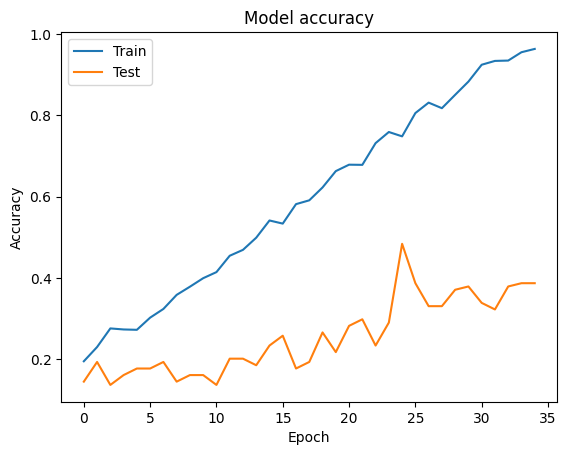

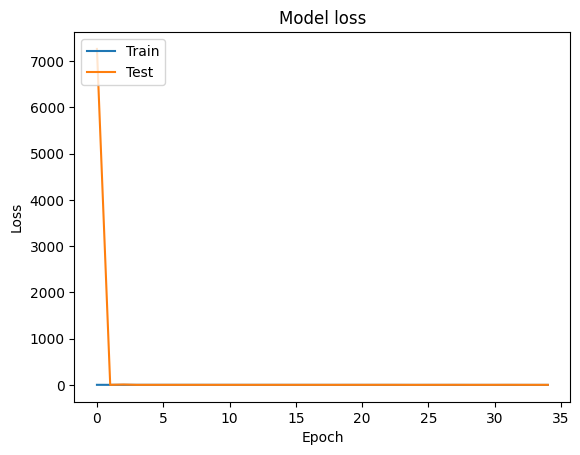

In [38]:
import matplotlib.pyplot as plot

plot.plot(data.history['accuracy'])
plot.plot(data.history['val_accuracy'])
plot.title('Model accuracy')
plot.ylabel('Accuracy')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

plot.plot(data.history['loss'])
plot.plot(data.history['val_loss'])
plot.title('Model loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

In [40]:

# model1.save('ResNet50CL.h5')
model1.save('ResNet50CL.h5')

# 모델 학습하기
ResNet50C (public 0.8996 when use TTA)

In [41]:
import tensorflow as tf

    # TPU 클러스터 해결하기 - 모델 2
resolver_model2 = tf.distribute.cluster_resolver.TPUClusterResolver()
tf.config.experimental_connect_to_cluster(resolver_model2)
tf.tpu.experimental.initialize_tpu_system(resolver_model2)

# TPU 전략 설정 - 모델 2
strategy_model2 = tf.distribute.TPUStrategy(resolver_model2)

# TPU 전략 내에서 모델 2 정의
with strategy_model2.scope():
    model2 = ResNet50C()
    model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model2.summary()

Model: "ResNet50C"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_28 (Conv2D)             (None, 112, 112, 64  9472        ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_28 (BatchN  (None, 112, 112, 64  256        ['conv2d_28[0][0]']              
 ormalization)                  )                                                         

In [42]:
EPOCH = 100
BATCH_SIZE = 32

filename = 'resnet50C-checkpoint.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(filename,             # file명을 지정합니다
                                                monitor='val_accuracy',   # val_accuracy 값이 개선되었을때 호출됩니다
                                                verbose=1,            # 로그를 출력합니다
                                                save_best_only=True,  # 가장 best 값만 저장합니다
                                                mode='auto'           # auto는 알아서 best를 찾습니다. min/max (loss->min, accuracy->max)
                                               )

earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', #stop 조건으로 관찰할 변수 선택
                                                 patience=10,            #10 Epoch동안 (val-accuracy가)개선되지 않는다면 종료
                                                )

reduceLR = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', #lr을 낮출 조건으로 관찰할 변수 선택
                                                factor=0.5,             #조건이 충족되었을때 LR에 factor를 곱함 (2분의 1배가 됨)
                                                patience=6,             #10 Epoch동안 (val-accuracy가)개선되지 않는다면 lr 감소
                                               )

In [43]:
data = model2.fit(X_train,
                 y_train,
                 validation_data=(X_valid, y_valid),
                 epochs=EPOCH,
                 batch_size=BATCH_SIZE,
                 callbacks=[reduceLR, earlystopping, checkpoint],)

Epoch 1/50
19/19 [==============================] - ETA: 0s - loss: 2.4659 - accuracy: 0.1897
Epoch 1: val_accuracy improved from -inf to 0.15323, saving model to resnet50C-checkpoint.h5
19/19 [==============================] - 154s 4s/step - loss: 2.4659 - accuracy: 0.1897 - val_loss: 1010794880.0000 - val_accuracy: 0.1532 - lr: 0.0010
Epoch 2/50
19/19 [==============================] - ETA: 0s - loss: 1.8200 - accuracy: 0.2046
Epoch 2: val_accuracy did not improve from 0.15323
19/19 [==============================] - 11s 581ms/step - loss: 1.8200 - accuracy: 0.2046 - val_loss: 1634233.5000 - val_accuracy: 0.1532 - lr: 0.0010
Epoch 3/50
19/19 [==============================] - ETA: 0s - loss: 1.7912 - accuracy: 0.2089
Epoch 3: val_accuracy improved from 0.15323 to 0.20161, saving model to resnet50C-checkpoint.h5
19/19 [==============================] - 22s 1s/step - loss: 1.7912 - accuracy: 0.2089 - val_loss: 6.6399 - val_accuracy: 0.2016 - lr: 0.0010
Epoch 4/50
19/19 [===============

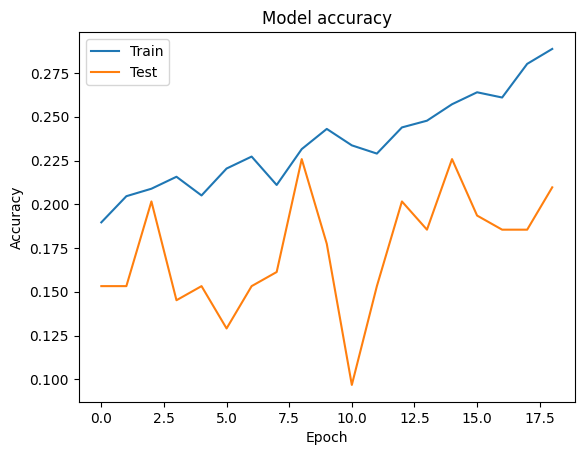

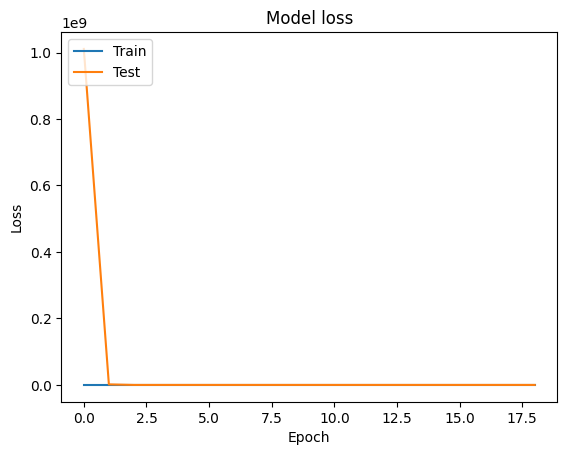

In [44]:
import matplotlib.pyplot as plot

plot.plot(data.history['accuracy'])
plot.plot(data.history['val_accuracy'])
plot.title('Model accuracy')
plot.ylabel('Accuracy')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

plot.plot(data.history['loss'])
plot.plot(data.history['val_loss'])
plot.title('Model loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

# 제출하기 (public 0.915 (ResNet50CL + ResNet50C))

In [45]:
model = tf.keras.models.load_model('./ResNet50CL.h5')
# model = tf.keras.models.load_model('./ResNet50CL.h5') #학습했던 Resnet50CL 불러오기

In [46]:
X_test_ori = test_images
X_test = test_images
X_test = X_test / 255.0

pred_proba = model.predict(X_test)

labels_array1 = np.zeros(len(X_test_ori))

#TTA 적용
for i in [1, 2, 3, 4]:
    X_test_aug = image_generator.flow(X_test_ori, labels_array1, batch_size=10000, shuffle=False, seed = 42^i).next()[0]
    X_test_aug = X_test_aug / 255.0
    pred_proba_aug = model.predict(X_test_aug)
    pred_proba = np.add(pred_proba, pred_proba_aug)

pred_class = []

for i in pred_proba:
    pred = np.argmax(i)
    pred_class.append(pred)

pred_class = le.inverse_transform(pred_class)
pred_class[0:5]

2/2 [==============================] - 2s 2s/step


array(['Bishop', 'Rook', 'Rook', 'Rook', 'Rook'], dtype='<U6')

In [47]:
model = tf.keras.models.load_model('./resnet50C-checkpoint.h5') #학습했던 Resnet50C 불러오기

In [48]:
pred_proba_2 = model.predict(X_test)
pred_proba = np.add(pred_proba, pred_proba_2) #resnet50CL 결과에 추론결과를 계속 더함

labels_array1 = np.zeros(len(X_test_ori))

#TTA 적용
for i in [1, 2, 3, 4]:
    X_test_aug = image_generator.flow(X_test_ori, labels_array1, batch_size=10000, shuffle=False, seed = 42^i).next()[0]
    X_test_aug = X_test_aug / 255.0
    pred_proba_aug = model.predict(X_test_aug)
    pred_proba = np.add(pred_proba, pred_proba_aug)

pred_class = []

for i in pred_proba:
    pred = np.argmax(i)
    pred_class.append(pred)

pred_class = le.inverse_transform(pred_class)
pred_class[0:5]

2/2 [==============================] - 3s 3s/step


array(['Bishop', 'Rook', 'Rook', 'Rook', 'Rook'], dtype='<U6')

In [49]:
import pandas as pd

sample_submission = pd.read_csv("./submission.csv")

sample_submission.target = pred_class
sample_submission.to_csv("submit.csv",index=False)

In [50]:
sample_submission.head(10)

,image,label
0,test_0.jpg,Bishop
1,test_1.jpg,Knight
2,test_2.jpg,Bishop
3,test_3.jpg,Bishop
4,test_4.jpg,Pawn
5,test_5.jpg,King
6,test_6.jpg,Bishop
7,test_7.jpg,Bishop
8,test_8.jpg,Pawn
9,test_9.jpg,Bishop


# 끝

=========================================================

# 이전내용

In [ ]:
# #create training dataset
# from glob import glob
# import numpy as np
# import PIL
# from PIL import Image

# path = './train/'

# training_images = []
# training_labels = []

# for filename in glob(path +"*"):
#     for img in glob(filename + "/*.jpg"):
#         an_img = PIL.Image.open(img) #read img
#         img_array = np.array(an_img) #img to array
#         training_images.append(img_array) #append array to training_images
#         label = filename.split('\\')[-1] #get label
#         training_labels.append(label) #append label

# training_images = np.array(training_images)
# training_labels = np.array(training_labels)

# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()
# training_labels= le.fit_transform(training_labels)
# training_labels = training_labels.reshape(-1,1)

# print(training_images.shape)
# print(training_labels.shape)

(412,)
(412, 1)


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

image_generator = ImageDataGenerator(
    rotation_range=20,
    brightness_range=[0.6, 1.0],
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=False
)

# 데이터 증강
training_image_aug = image_generator.flow(training_images, training_labels, batch_size=412, shuffle=False, seed=42).next()[0]
training_image_aug_2 = image_generator.flow(training_images, training_labels, batch_size=412, shuffle=False, seed=42^2).next()[0]
training_image_aug_3 = image_generator.flow(training_images, training_labels, batch_size=412, shuffle=False, seed=42^3).next()[0]
training_image_aug_4 = image_generator.flow(training_images, training_labels, batch_size=412, shuffle=False, seed=42^4).next()[0]


In [ ]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# import tensorflow as tf

# tf.random.set_seed(42)

# image_generator = ImageDataGenerator(
#     rotation_range=20,
#     brightness_range = [0.6, 1.0],
#     zoom_range=0.2,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     horizontal_flip=True,
#     vertical_flip=False
# )

In [ ]:
# training_images = np.concatenate((training_images,
#                                   training_image_aug,
#                                   training_image_aug_2,
#                                   training_image_aug_3,
#                                   training_image_aug_4))

# training_labels = np.concatenate((training_labels,
#                                   training_labels,
#                                   training_labels,
#                                   training_labels,
#                                   training_labels))

# training_labels = tf.one_hot(training_labels, 10) #one-hot 기법 적용
# training_labels = np.array(training_labels)
# training_labels = training_labels.reshape(-1,10) #one-hot 기법을 적용했다면, shape을 바꿔줍니다.

In [ ]:
#create test dataset

path = './test/'

test_images = []
test_idx = []

flist = sorted(glob(path + '*.jpg'))

for filename in flist:
    an_img = PIL.Image.open(filename) #read img
    img_array = np.array(an_img) #img to array
    test_images.append(img_array) #append array to training_images
    label = filename.split('\\')[-1] #get id
    test_idx.append(label) #append id

test_images = np.array(test_images)

print(test_images.shape)
print(test_idx[0:5])

(53,)
['./test/test_0.jpg', './test/test_1.jpg', './test/test_12.jpg', './test/test_13.jpg', './test/test_14.jpg']


# **데이터 전처리**

data augmentation을 통한 데이터 생성
vertical_flip은 사용하지 않습니다. Mixup은 TTA를 위해서 사용하지 않았습니다.

Test Time Augmention 및 Data Augmentation의 강도를 정할때 아래 사이트의 의견을 참고했습니다.

https://towardsdatascience.com/test-time-augmentation-tta-and-how-to-perform-it-with-keras-4ac19b67fb4d

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

tf.random.set_seed(42)

image_generator = ImageDataGenerator(
    rotation_range=20,
    brightness_range = [0.6, 1.0],
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=False
)


training_labels_one_hot = tf.keras.utils.to_categorical(training_labels)  # 라벨을 One-Hot Encoding으로 변환

In [ ]:
training_image_aug = image_generator.flow(training_images, training_labels_one_hot, batch_size=16, shuffle=False, seed = 42).next()[0]
training_image_aug_2 = image_generator.flow(training_images, training_labels_one_hot, batch_size=16, shuffle=False, seed = 42^2).next()[0]
training_image_aug_3 = image_generator.flow(training_images, training_labels_one_hot, batch_size=16, shuffle=False, seed = 42^3).next()[0]
training_image_aug_4 = image_generator.flow(training_images, training_labels_one_hot, batch_size=16, shuffle=False, seed = 42^4).next()[0]

ValueError: setting an array element with a sequence.

==================================

In [ ]:
# import numpy as np
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# # 임의의 이미지 데이터 생성 (예시)
# training_images = np.random.rand(412, image_shape)

# # 각 이미지에 대한 레이블을 생성 (예시: 이미지마다 레이블은 0부터 411까지로 설정)
# training_labels = np.arange(0, 412).reshape(-1, 1)

# image_generator = ImageDataGenerator(
#     rotation_range=20,
#     brightness_range=[0.6, 1.0],
#     zoom_range=0.2,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     horizontal_flip=True,
#     vertical_flip=False
# )

# # 데이터 증강
# training_image_aug = image_generator.flow(training_images, training_labels, batch_size=412, shuffle=False, seed=42).next()[0]
# training_image_aug_2 = image_generator.flow(training_images, training_labels, batch_size=412, shuffle=False, seed=42^2).next()[0]
# training_image_aug_3 = image_generator.flow(training_images, training_labels, batch_size=412, shuffle=False, seed=42^3).next()[0]
# training_image_aug_4 = image_generator.flow(training_images, training_labels, batch_size=412, shuffle=False, seed=42^4).next()[0]


In [ ]:
# training_images = np.concatenate((training_images,
#                                   training_image_aug,
#                                   training_image_aug_2,
#                                   training_image_aug_3,
#                                   training_image_aug_4))

# training_labels = np.concatenate((training_labels,
#                                   training_labels,
#                                   training_labels,
#                                   training_labels,
#                                   training_labels))

# training_labels = tf.one_hot(training_labels, 10) #one-hot 기법 적용
# training_labels = np.array(training_labels)
# training_labels = training_labels.reshape(-1,10) #one-hot 기법을 적용했다면, shape을 바꿔줍니다.

#  여기부터 베이스라인 ____________________________________


# -------------------------------------------------------

In [ ]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
import shutil
import glob
import seaborn as sns
import tensorflow as tf
from  tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, InputLayer, Resizing
from tensorflow.keras.layers import Conv2D, BatchNormalization
from tensorflow.keras.layers import MaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Flatten, RandomRotation, RandomTranslation, RandomFlip, RandomContrast
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import cohen_kappa_score
from keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing import image
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers.experimental import preprocessing

In [ ]:
base_path = './'

train_df = pd.read_csv(os.path.join(base_path, 'train.csv'))

In [ ]:
train_df

,image,label
0,Bishop_0.JPG,Bishop
1,Bishop_1.jpg,Bishop
2,Bishop_10.jpg,Bishop
3,Bishop_11.jpg,Bishop
4,Bishop_12.jpg,Bishop
...,...,...
491,Rook_88.jpg,Rook
492,Rook_89.jpg,Rook
493,Rook_9.jpg,Rook
494,Rook_90.jpg,Rook


In [ ]:
train_df.label.value_counts()

Pawn      97
Knight    96
Rook      92
Bishop    77
Queen     68
King      66
Name: label, dtype: int64

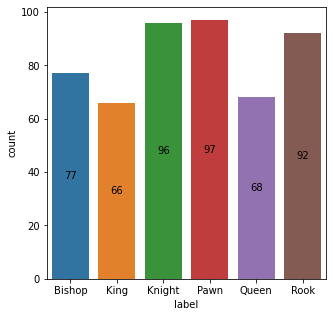

In [ ]:
# 데이터 분포

figure = plt.figure(figsize=(5, 5))
ax = figure.add_subplot()
sns.countplot(data=train_df, x='label', ax=ax)

for patch in ax.patches:
    label_x = patch.get_x() + patch.get_width()/2
    label_y = patch.get_y() + patch.get_height()/2
    text_msg = str(int(patch.get_height()))
    ax.text(label_x, label_y, text_msg, horizontalalignment='center', verticalalignment='center')

plt.show()

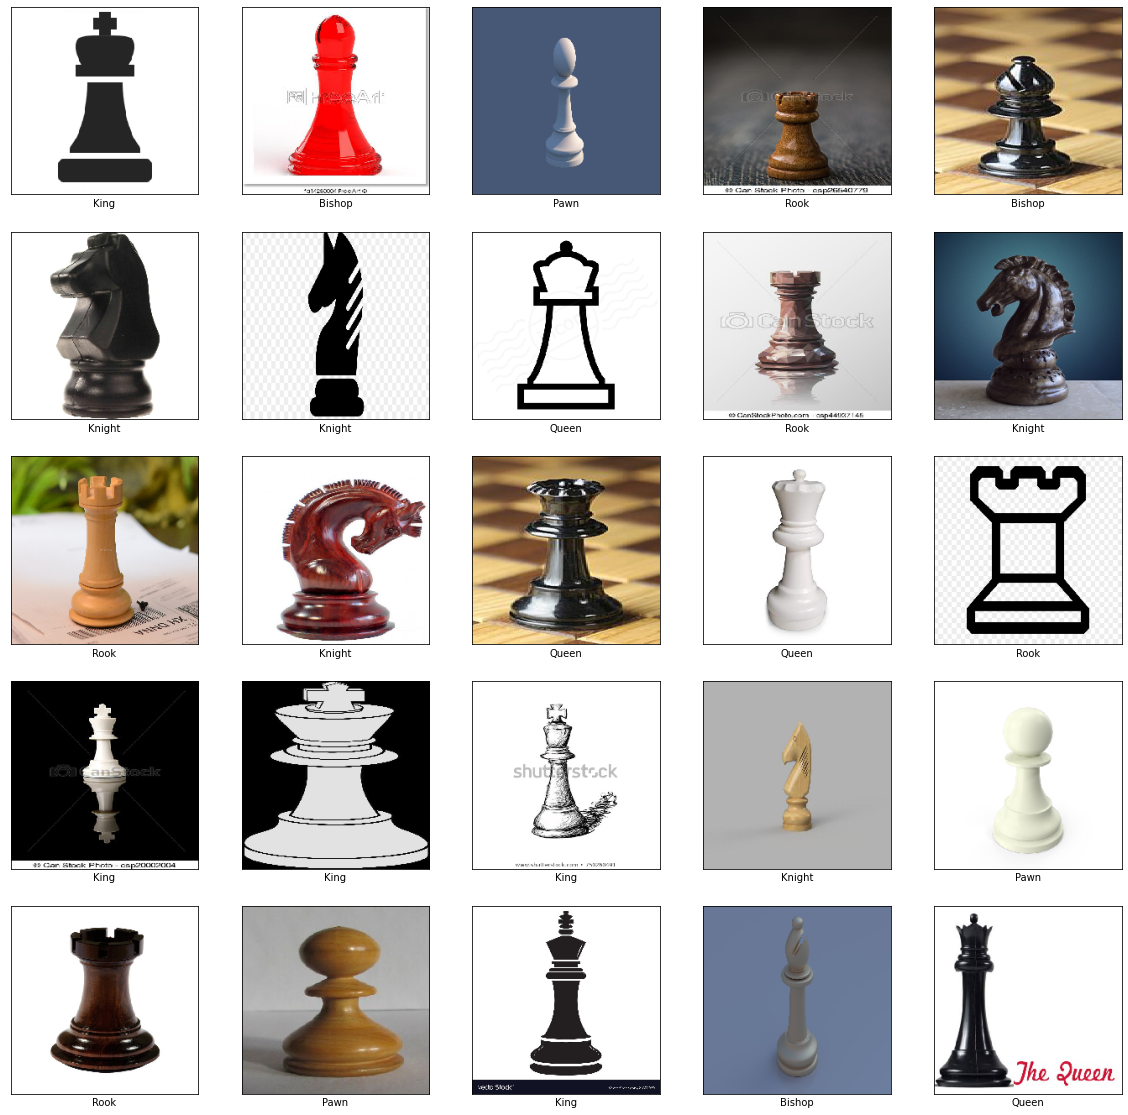

In [ ]:
# 이미지 시각화
train_path = base_path +'/train'

plt.figure(figsize=(20,20))
index = np.random.randint(len(train_df), size=25)
for i in range(25):
    label = train_df['label'][index[i]]
    path_img = train_df['image'][index[i]]
    path_img = os.path.join(train_path, os.path.join(label, path_img))

    img = image.load_img(path_img,target_size=(224,224))
    img_tensor = image.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis=0)
    img_tensor /= 255.
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img, cmap=plt.cm.binary)
    plt.xlabel(label)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

train, valid = train_test_split(train_df, test_size=0.25, stratify=train_df['label'])
train = train.reset_index(drop=True)
valid = valid.reset_index(drop=True)

In [ ]:
train

,image,label
0,King_50.jpg,King
1,Pawn_65.jpg,Pawn
2,Queen_61.jpg,Queen
3,Queen_33.jpg,Queen
4,Queen_30.jpg,Queen
...,...,...
367,Rook_20.png,Rook
368,Pawn_16.fcgi,Pawn
369,Bishop_15.jpg,Bishop
370,Pawn_50.png,Pawn


In [ ]:
train['image'] = train['image'].map(lambda x: x.split('_')[0]+'/'+x)
train.head(10)

,image,label
0,King/King_50.jpg,King
1,Pawn/Pawn_65.jpg,Pawn
2,Queen/Queen_61.jpg,Queen
3,Queen/Queen_33.jpg,Queen
4,Queen/Queen_30.jpg,Queen
5,Pawn/Pawn_9.jpg,Pawn
6,Queen/Queen_63.jpg,Queen
7,King/King_62.jpg,King
8,Rook/Rook_67.jpg,Rook
9,Bishop/Bishop_56.jpg,Bishop


In [ ]:
valid['image'] = valid['image'].map(lambda x: x.split('_')[0]+'/'+x)
valid.head(10)

,image,label
0,Pawn/Pawn_7.jpg,Pawn
1,Pawn/Pawn_27.jpeg,Pawn
2,Knight/Knight_71.jpg,Knight
3,Queen/Queen_56.jpg,Queen
4,King/King_61.jpg,King
5,Knight/Knight_18.jpg,Knight
6,Rook/Rook_78.jpg,Rook
7,Bishop/Bishop_41.jpg,Bishop
8,Pawn/Pawn_4.jpg,Pawn
9,Pawn/Pawn_35.JPG,Pawn


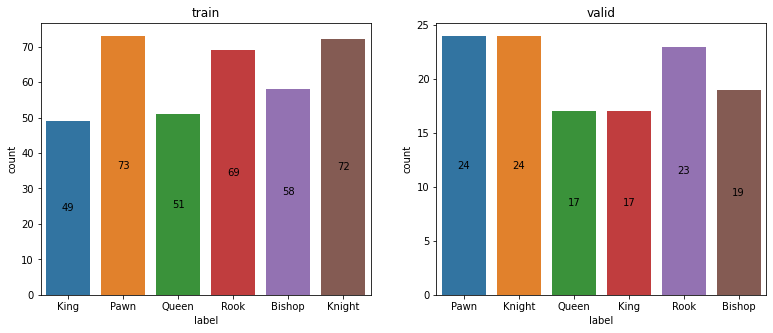

In [ ]:
# 분할 후 데이터 분포

figure, ax = plt.subplots(1, 2, figsize=(13,5))
sns.countplot(data=train, x='label', ax=ax[0])
sns.countplot(data=valid, x='label', ax=ax[1])

ax[0].set_title('train')
for patch in ax[0].patches:
    label_x = patch.get_x() + patch.get_width()/2
    label_y = patch.get_y() + patch.get_height()/2
    text_msg = str(int(patch.get_height()))
    ax[0].text(label_x, label_y, text_msg, horizontalalignment='center', verticalalignment='center')

ax[1].set_title('valid')
for patch in ax[1].patches:
    label_x = patch.get_x() + patch.get_width()/2
    label_y = patch.get_y() + patch.get_height()/2
    text_msg = str(int(patch.get_height()))
    ax[1].text(label_x, label_y, text_msg, horizontalalignment='center', verticalalignment='center')

plt.show()

In [ ]:
# 데이터 증강

height, width, channel = (224, 224, 3)
batch_size = 16
labels = ['sunny', 'snow', 'rain', 'dust', 'fog']

train_datagen= ImageDataGenerator(rescale=1./255,
                              rotation_range=20,
                              width_shift_range=0.05,
                              height_shift_range=0.05,
                              zoom_range=[0.7, 1],
                              horizontal_flip=True,
                              vertical_flip=False,
                              fill_mode='nearest')



train_generator = train_datagen.flow_from_dataframe(train,
                                                   directory = train_path,
                                                   x_col='image',
                                                   y_col='label',
                                                   batch_size=batch_size,
                                                   class_mode='categorical',
                                                   color_mode= 'rgb',
                                                   target_size=(height, width))





valid_datagen = ImageDataGenerator(rescale=1. / 255.)

valid_generator = valid_datagen.flow_from_dataframe(valid,
                                                   directory = train_path,
                                                   x_col='image',
                                                   y_col='label',
                                                   batch_size=batch_size,
                                                   class_mode='categorical',
                                                   color_mode= 'rgb',
                                                   target_size=(height, width))

Found 367 validated image filenames belonging to 6 classes.
Found 124 validated image filenames belonging to 6 classes.


/home/jovyan/.local/lib/python3.8/site-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 5 invalid image filename(s) in x_col="image". These filename(s) will be ignored.
  warnings.warn(


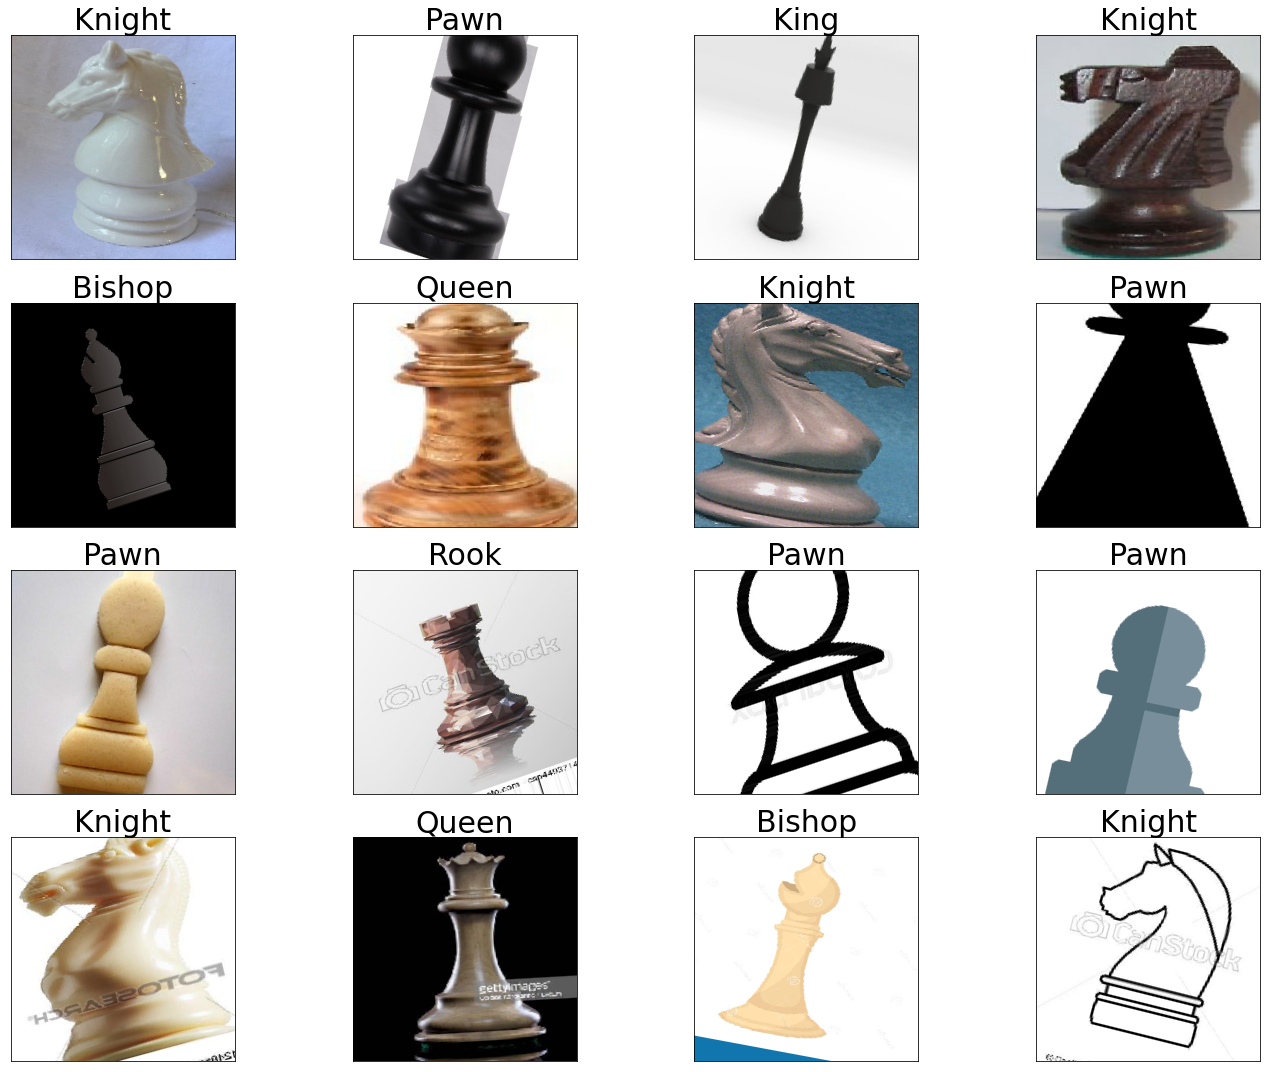

In [ ]:
# 데이터 증강 시각화

pred2label={}
for x in train_generator.class_indices.keys():
    pred2label[train_generator.class_indices[x]] = x


plt.figure(figsize=(20,15))
index = np.random.randint(len(train_df), size=batch_size)
x_augs, y_augs = train_generator.next()
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(x_augs[i, :, :, :])
    plt.title(pred2label[np.argmax(y_augs[i, :])], fontsize=30)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
plt.tight_layout()
plt.show()

In [ ]:
base_model = tf.keras.applications.VGG19(include_top = False) # Load the VGG19 model without the top layer
base_model.trainable = False # Freeze the base model layers to prevent backpropagation through them

inputs = tf.keras.Input(shape = (224, 224, 3)) # Input layer

x = base_model(inputs) # Pass the image through the base model
x = layers.Dropout(0.4)(x) # Apply dropout to prevent overfitting

x = layers.Conv2D(256, 3, activation = 'relu', padding = 'same')(x)
x = layers.Dropout(0.5)(x)

x = tf.keras.layers.GlobalMaxPooling2D()(x) # Perform global max pooling to reduce the spatial dimensions
x = layers.Dropout(0.6)(x)

x = layers.Dense(6)(x) # Output layer
outputs = layers.Activation("softmax")(x)

# Create the model
model = tf.keras.Model(inputs, outputs)

# Compile the model
model.compile(loss = "categorical_crossentropy",
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["accuracy"])

2023-11-26 08:50:41.084332: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 7923 MB memory:  -> device: 0, name: NVIDIA A100 80GB PCIe MIG 1g.10gb, pci bus id: 0000:d5:00.0, compute capability: 8.0


In [ ]:
print(height,  ' ', width, ' ', channel)

224   224   3


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vgg19 (Functional)          (None, None, None, 512)   20024384  
                                                                 
 dropout (Dropout)           (None, 7, 7, 512)         0         
                                                                 
 conv2d (Conv2D)             (None, 7, 7, 256)         1179904   
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 256)         0         
                                                                 
 global_max_pooling2d (Glob  (None, 256)               0         
 alMaxPooling2D)                                                 
                                                             

In [ ]:
# 모델 컴파일 진행 - 아까와 달리 categorical_crossentropy 사용 > label이 숫자형 데이터이므로
model.compile(optimizer = Adam(learning_rate= 0.001),
                  loss = 'categorical_crossentropy',
                  metrics=['accuracy'])


# 조기멈춤
stop = EarlyStopping(patience=5)

# 자동 저장
checkpoint = ModelCheckpoint("./best_model",monitor='val_accuracy',
                            save_weights_only=True, mode='max',verbose=1,save_best_only=True)
callbacks = [stop, checkpoint]

# 모델 fitting
save = model.fit(train_generator,epochs = 20, validation_data=valid_generator, batch_size=32, callbacks=callbacks)

Epoch 1/20


2023-11-26 08:51:03.974783: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2023-11-26 08:51:05.620048: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:425] Loaded runtime CuDNN library: 8.2.0 but source was compiled with: 8.6.0.  CuDNN library needs to have matching major version and equal or higher minor version. If using a binary install, upgrade your CuDNN library.  If building from sources, make sure the library loaded at runtime is compatible with the version specified during compile configuration.
2023-11-26 08:51:05.621320: W tensorflow/core/framework/op_kernel.cc:1828] OP_REQUIRES failed at conv_ops_fused_impl.h:625 : UNIMPLEMENTED: DNN library is not found.


UnimplementedError: Graph execution error:

Detected at node 'model/vgg19/block1_conv1/Relu' defined at (most recent call last):
    File "/usr/lib/python3.8/runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.8/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.8/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.8/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.8/dist-packages/ipykernel/kernelapp.py", line 677, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.8/dist-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.8/asyncio/base_events.py", line 570, in run_forever
      self._run_once()
    File "/usr/lib/python3.8/asyncio/base_events.py", line 1859, in _run_once
      handle._run()
    File "/usr/lib/python3.8/asyncio/events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "/usr/local/lib/python3.8/dist-packages/ipykernel/kernelbase.py", line 457, in dispatch_queue
      await self.process_one()
    File "/usr/local/lib/python3.8/dist-packages/ipykernel/kernelbase.py", line 446, in process_one
      await dispatch(*args)
    File "/usr/local/lib/python3.8/dist-packages/ipykernel/kernelbase.py", line 353, in dispatch_shell
      await result
    File "/usr/local/lib/python3.8/dist-packages/ipykernel/kernelbase.py", line 648, in execute_request
      reply_content = await reply_content
    File "/usr/local/lib/python3.8/dist-packages/ipykernel/ipkernel.py", line 353, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "/usr/local/lib/python3.8/dist-packages/ipykernel/zmqshell.py", line 533, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py", line 2914, in run_cell
      result = self._run_cell(
    File "/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py", line 2960, in _run_cell
      return runner(coro)
    File "/usr/local/lib/python3.8/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner
      coro.send(None)
    File "/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py", line 3185, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py", line 3377, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py", line 3457, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_14385/1790007421.py", line 16, in <module>
      save = model.fit(train_generator,epochs = 20, validation_data=valid_generator, batch_size=32, callbacks=callbacks)
    File "/home/jovyan/.local/lib/python3.8/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/jovyan/.local/lib/python3.8/site-packages/keras/src/engine/training.py", line 1742, in fit
      tmp_logs = self.train_function(iterator)
    File "/home/jovyan/.local/lib/python3.8/site-packages/keras/src/engine/training.py", line 1338, in train_function
      return step_function(self, iterator)
    File "/home/jovyan/.local/lib/python3.8/site-packages/keras/src/engine/training.py", line 1322, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/jovyan/.local/lib/python3.8/site-packages/keras/src/engine/training.py", line 1303, in run_step
      outputs = model.train_step(data)
    File "/home/jovyan/.local/lib/python3.8/site-packages/keras/src/engine/training.py", line 1080, in train_step
      y_pred = self(x, training=True)
    File "/home/jovyan/.local/lib/python3.8/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/jovyan/.local/lib/python3.8/site-packages/keras/src/engine/training.py", line 569, in __call__
      return super().__call__(*args, **kwargs)
    File "/home/jovyan/.local/lib/python3.8/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/jovyan/.local/lib/python3.8/site-packages/keras/src/engine/base_layer.py", line 1150, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/jovyan/.local/lib/python3.8/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/home/jovyan/.local/lib/python3.8/site-packages/keras/src/engine/functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "/home/jovyan/.local/lib/python3.8/site-packages/keras/src/engine/functional.py", line 669, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/home/jovyan/.local/lib/python3.8/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/jovyan/.local/lib/python3.8/site-packages/keras/src/engine/training.py", line 569, in __call__
      return super().__call__(*args, **kwargs)
    File "/home/jovyan/.local/lib/python3.8/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/jovyan/.local/lib/python3.8/site-packages/keras/src/engine/base_layer.py", line 1150, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/jovyan/.local/lib/python3.8/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/home/jovyan/.local/lib/python3.8/site-packages/keras/src/engine/functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "/home/jovyan/.local/lib/python3.8/site-packages/keras/src/engine/functional.py", line 669, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/home/jovyan/.local/lib/python3.8/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/jovyan/.local/lib/python3.8/site-packages/keras/src/engine/base_layer.py", line 1150, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/jovyan/.local/lib/python3.8/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/home/jovyan/.local/lib/python3.8/site-packages/keras/src/layers/convolutional/base_conv.py", line 321, in call
      return self.activation(outputs)
    File "/home/jovyan/.local/lib/python3.8/site-packages/keras/src/activations.py", line 321, in relu
      return backend.relu(
    File "/home/jovyan/.local/lib/python3.8/site-packages/keras/src/backend.py", line 5397, in relu
      x = tf.nn.relu(x)
Node: 'model/vgg19/block1_conv1/Relu'
DNN library is not found.
	 [[{{node model/vgg19/block1_conv1/Relu}}]] [Op:__inference_train_function_1990]

In [ ]:
test_df = pd.read_csv(base_path + "/test.csv")
test_df.head(5)

,image,label
0,test_0.jpg,NaN
1,test_1.jpg,NaN
2,test_2.jpg,NaN
3,test_3.jpg,NaN
4,test_4.jpg,NaN


In [ ]:
batch_size = len(test_df["image"])
height, width, channel = 224, 224, 3

In [ ]:
# 테스트 이미지를 메모리에 올림.
test_path = base_path + '/test'

test_image = np.zeros((batch_size, height, width, channel))
print(test_image.shape)
cnt=0
for i in range(len(test_df["image"])):
    path_img = test_df['image'][i]
    img = image.load_img(os.path.join(test_path,path_img), target_size=(height, width))
    img_tensor = image.img_to_array(img)
    img_tensor = np.array(img_tensor,dtype="float32")

    img_tensor /= 255

    img_tensor = np.expand_dims(img_tensor, axis=0)

    test_image[i] = img_tensor

(60, 224, 224, 3)


In [ ]:
predictions = model.predict(test_image)
predictions.shape

(60, 6)

In [ ]:
test_df['label'] = [pred2label[np.argmax(pred)] for pred in predictions]
test_df

,image,label
0,test_0.jpg,Bishop
1,test_1.jpg,Knight
2,test_2.jpg,Bishop
3,test_3.jpg,Bishop
4,test_4.jpg,Pawn
5,test_5.jpg,King
6,test_6.jpg,Bishop
7,test_7.jpg,Bishop
8,test_8.jpg,Pawn
9,test_9.jpg,Bishop


In [ ]:
test_df.to_csv('./submission.csv', index=False)

# ===========================================

# https://github.com/wonjin0403/dacon_object-classification-contest/blob/master/main.py

https://dacon.io/competitions/open/235874/codeshare/4657?page=1&dtype=recent

dataloader.py

In [ ]:
import torch
import torch.utils.data as data
import random
import numpy as np
import pandas as pd
import time
import os
import cv2
import h5py # why exists?
from glob import glob
import warnings
from collections import namedtuple
from PIL import Image
import matplotlib.pyplot as plt
from PIL import Image

class CIFAR10_Dataset(data.Dataset):
    def __init__(self, img_root, transforms=None):
        self.img_paths = glob(img_root + '/*/*')
        self.transforms = transforms
        if len(self.img_paths) == 0:
            raise ValueError("Check data path : %s"%(img_root))
        self.label_dict = {
            "airplane" : 0,
            "automobile" : 1,
            "bird" : 2,
            "cat" : 3,
            "deer" : 4,
            "dog" : 5,
            "frog" : 6,
            "horse" : 7,
            "ship" : 8,
            "truck" : 9
        }

    def __getitem__(self, idx):
        path_file = self.img_paths[idx]
        #image = cv2.imread(path_file)
        #image = np.array(image, dtype=np.float32)
        image = Image.open(path_file)
        if self.transforms is not None:
            image = self.transforms(image)
        label = np.zeros([10])
        label[self.label_dict[path_file.split("/")[-2]]] = 1

        return image, label

    def __len__(self):
        return len(self.img_paths)

class Inference_Dataset(data.Dataset):
    def __init__(self, img_root, csv_path, transforms=None):
        self.img_root = img_root
        self.img_paths = glob(img_root + '/*')
        self.pd_csv = pd.read_csv(csv_path)
        self.transforms = transforms
        if len(self.img_paths) == 0:
            raise ValueError("Check data path : %s"%(img_root))

    def __getitem__(self, idx):
        id = self.pd_csv["id"][idx]
        path_file = os.path.join(str(self.img_root), id)
        image = Image.open(path_file)
        if self.transforms is not None:
            image = self.transforms(image)

        return image.float()

    def __len__(self):
        return len(self.img_paths)

class WrapperDataset:
    def __init__(self, dataset, transform=None):
        self.dataset = dataset
        self.transform = transform

    def __getitem__(self, index):
        image, answer = self.dataset[index]

        if self.transform is not None:
            image = self.transform(image)

        answer = torch.from_numpy(answer)
        return image.float(), answer.float()

    def __len__(self):
        return len(self.dataset)



main.py

In [ ]:
import os
import random
import numpy as np
import torch
import argparse

from utils.arg_parser import parse_args
from Dataloader import CIFAR10_Dataset, Inference_Dataset
from trainers.Trainer import Trainer


def seed_everything(seed):
    random.seed(seed)
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)  # type: ignore
    torch.backends.cudnn.deterministic = True  # type: ignore
    torch.backends.cudnn.benchmark = True

def main():

    # Input argument from shell script
    argparser = argparse.ArgumentParser()
    # INI script file name
    argparser.add_argument('inifile')
    # TODO: Add TensorboardX to store losses, metrics, and output images
    argparser.add_argument('--log_dir', nargs='?', help='Dir to save logs')
    cmd_args = argparser.parse_args()

    args = parse_args(cmd_args.inifile)

    # overwrite ini args with cmd args
    for k, v in cmd_args.__dict__.items():
        if v:
            # create non-existing directory
            if k.endswith('dir'):
                if not os.path.exists(v):
                    os.makedirs(v)

            args.__setattr__(k, v)

    seed_everything(args.seed)

    data_set = CIFAR10_Dataset(os.path.join(str(args.data_path), "new_train"))
    test_dataset = CIFAR10_Dataset(os.path.join(str(args.data_path), "new_test"))
    trainer = Trainer(args, data_set, test_dataset)

    if args.phase == 'train':
        trainer.train()
        trainer.test()
    elif args.phase == 'test':
        trainer.test()
    elif args.phase == 'inference':
        trainer.inference()
if __name__ == "__main__":
    main()

모델.py

In [ ]:
from efficientnet_pytorch import EfficientNet
import torch.nn as nn
from timm import create_model
import torchvision.models as models

class RESNET18(nn.Module):
    def __init__(self, out_channels):
        super(RESNET18, self).__init__()
        self.res18 = models.resnet18(pretrained=False)
        self.res18.fc = nn.Linear(in_features=self.res18.fc.in_features, out_features=out_channels)
        self.feature1 = nn.Sequential(*(list(self.res18.children())[0:8]))
        self.feature2 = nn.Sequential(list(self.res18.children())[8])
        self.feature3 = nn.Sequential(list(self.res18.children())[9])

    def forward(self, x):
        map = self.feature1(x)
        h1 = self.feature2(map)
        output = self.feature3(h1.reshape(h1.shape[0], -1))
        return output